# SIXT33N
## Phase 2: System Identification 

### EE 16B: Designing Information Devices and Systems II, Spring 2018

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

## Table of Contents

* [Introduction](#intro)
* [Part 1: The SIXT33N Car](#part1)
* [Part 2: Power, Sensor, and Actuator Circuits](#part2)
* [Part 3: Sensor Verification](#part3)
* [Part 4: Changing to Battery](#part4)
* [Part 5: Open Loop Data Collection and Parameter Estimation](#part5)
* [Part 6: Determining the Operating Point](#part6)

<a id='intro'></a>
## Introduction

In this phase we will
- build the SIXT33N chassis, sensors (wheel encoders), and actuators (motor drivers)
- test the encoders to verify our sensing readings are accurate.
- model the the car as an open loop system.
- collect data and determine the parameters of our model using least-squares.

**Remember to document all design choices you made and explain them in the project report.**

<a id='part1'></a>
## <span style="color:blue">Part 1: The SIXT33N Car</span>

### Materials
- Chassis kit
- 2 Photointerrupters
- Soldering iron + solder

Build the SIXT33N car from the kit. The instructions can be found in the ipython notebook called `SIXT33N_Car_Instructions`.

<a id='part2'></a>
## <span style="color:blue">Part 2: Power, Sensor, and Actuator Circuits</span>

### Materials
- 2 C2690A NPN BJTs (Bipolar Junction Transistor)
- 2 IN4001 Diodes
- 1 op-amp chip (2 op-amps)
- 2 20k$\Omega$ resistors
- 2 10k$\Omega$ resistors
- 2 1.5k$\Omega$ resistors
- 2 10 $\Omega$ resistors
- 1 switch


### Before we build anything on our circuit, let's recall the general layout of the breadboard from last week (Project Part 1: Microphone Front End).

Our circuit will need two sources of power: 
1. ** 5V (Will come from the voltage regulator) **
2. ** 3.3V (Will come from the launchpad) **

** There is no negative voltage source. **

Try to divide your breadboard into the following sections so that you have room for them all.
- Use both of your (+) rails for 3.3V because most of the circuit will use 3.3V.
- Plug your 5V source into a row close to your mic board.  Today, only the mic board uses the 5V supply.
- Connect the ground of the 3.3V and 5V supplies, and connect the two (-) to create your ground rail.
- The purple section is where you will build your front end.
- The blue sections are set aside for your motor driver circuits later in the project

<img style="width:700px" src="images/circuit_outline_diagram_v2_with_voltage_reg_single_cap.png">

**KEEP YOUR CIRCUIT NEAT!** That goes without saying :)


You do not want to run SIXT33N's motors off your laptop. Instead, **you will run the car off of two 9V batteries**. One of the batteries is used exclusively for the motors, and the other for powering the Launchpad and microphone front end. Using the same voltage source could potentially reset the Launchpad when the power draw spikes from the motors. The power distribution is shown in the diagram below. The front end circuit will use both the 5V regulator output and the Launchpad's 3.3V pin.

**Note that all the grounds (including the grounds of the two batteries) are still connected.**

<br/><br/>

<center>
<img width="700px" src="images/proj-power.png">
</center>

## Motor Drivers
To be able to move, the car needs motor drivers. The DC motors we use are driven by a Pulse Width Modulated (PWM) signal, which the Launchpad will produce. A PWM signal is simply a square wave at a certain frequency but with variable duty cycle (percentage time the signal is high in a period). Since the motors need a lot of power, as mentioned before, we will connect the motors to their own separate 9V battery and an NPN transistor.

The <a href="https://www.allaboutcircuits.com/textbook/semiconductors/chpt-4/bipolar-junction-transistors-bjt/">NPN bipolar junction transistor</a> behaves a little different from the NMOS you are familiar with, but both transistors can still be considered switch-like. An NMOS uses voltage to control whether the switch is off or on, whereas a BJT uses current to control the switch. However, BJTs burned out by running too much current through them, so a $1.5\mathrm{k}\Omega$ resistor is used to limit the current. The Launchpad generates a low-voltage, low-power PWM signal, which switches the transistor on and off. This allows us to feed the motors a high-power PWM signal without having to use a microcontroller with the capability of outputting sufficient power to power the motors directly.

### Your tasks:

##### **1. Construct the circuit below for each wheel using the <a href="https://www.fairchildsemi.com/datasheets/KS/KSC2690A.pdf">C2690A</a> NPN BJT on the breadboard**.

   - <img width="250px" src="images/motor-drive-with-switch.jpg">
    - **Use a different breadboard row for the 9V for the motors than the 9V for the voltage regulator.**
    - The motor is reversible so connect it any way for now. If it turns out to go backwards later, just reverse the two terminals of the motor.
    - The pin diagram of the BJT is reproduced below. Note that the diagram has the markings in the black plastic part facing up. <span style="color:red">**Make sure to match the Base, Emitter, and Collector properly to the schematic.**</span>
    - <span style="color:red">**Check your kit for diodes and BJTs before getting any from the TA desk.**</span>
    - <img width="250px" src="images/proj-bjt.png">
    - A <a href="https://www.allaboutcircuits.com/textbook/semiconductors/chpt-3/introduction-to-diodes-and-rectifiers/">diode</a> is a component that only conducts current one way. This diode is needed because of the inductive characteristics of the motor. If the motor is on and we turn it off, the inductive behavior of the motor maintains the current and we need a way to dissipate it. The diagram for the diode is shown below. **Note that the diode has a direction** - be careful which terminal is attached to the 9V power supply.
    - <img width="300px" src="images/proj-diode.png">
    
    
    
##### **2. Add a switch between 9V and the motor drivers.** You only need **ONE** switch!
   - Place the switch somewhere fairly central (wrt the long side) on your breadboard.
    - Connect the 9V to one terminal and connect **BOTH** your motor controller circuits' 9V nodes to another. 
    - **Sanity check:** the middle pin of your switch should be connected to something.
         
         
         
##### **3. Remove the 9V power supply from the 5V regulator (if it's connected), and move it to the switch to test the motors, AND set a current limit of 600mA.**
   - We have limited rechargeable 9V batteries, so use the power supply when working at your lab station for long periods of time.
    - The motors can each draw 200-300mA.
    - If your motors draw the maximum current, increase the limit to 800mA.
    
    
##### **4. ** Test the motor drivers. For each motor driver:
   - Connect the node of the resistor labeled `MSP430 output pin` in the schematic to the function generator.
    - Set the function generator to output a **1kHz square wave with 3Vpp, 1.65V offset, 80% duty cycle**.
    - Changing the duty cycle should control the speed of the wheels.
    - Remember to **set the output of the function generator to high impedance**.
    
    
##### **5. **<span style="color:red">**Make sure that both motors drive as expected. They might not go at the same speed - our control loop will fix that.**</span>

##### **6. Once the motor circuit is verified,** Leave the resistor terminals that are supposed to be driven by the Launchpad pins connected to ground. This keeps the motors off.

         
##### **4. Remove the 9V power supply from the 5V regulator (if it's connected), and move it to the switch to test the motors, AND set a current limit of 600mA.**
   - We have limited rechargeable 9V batteries, so use the power supply when working at your lab station for long periods of time.
    - The motors can each draw 200-300mA.
    - If your motors draw the maximum current, increase the limit to 800mA.
    
    
##### **5. ** Test the motor drivers. For each motor driver:
   - Connect the node of the resistor labeled `MSP430 output pin` in the schematic to the function generator.
    - Set the function generator to output a **1kHz square wave with 3Vpp, 1.65V offset, 80% duty cycle**.
    - Changing the duty cycle should control the speed of the wheels.
    - Remember to **set the output of the function generator to high impedance**.
    
    
##### **6. **<span style="color:red">**Make sure that both motors drive as expected. They might not go at the same speed - our control loop will fix that.**</span>


## Wheel Encoders

### Your tasks: 

1. Put the photointerrupter modules in their slots as shown below.
<br/><br/>
<center>
<img width="400px" src="images/proj-car-encoder1.jpg">
</center>

2. Connect the encoders to the Launchpad as follows: 
    * Use 4 female-male jumper wires per encoder, three for making connections from the encoder to the breadboard, and one for making a connection between the breadboard and MSP. 
    * Connect the 'G' (ground) pins to ground on your breadboard, ideally closely to the ground of your Launchpad battery.
    * Connect the 'V' (voltage) pins to the 3.3V pins of your breadboard, ideally closely to the 3.3V jumper coming from the Launchpad.
    * Connect the 'S' (signal) pins to the breadboard.
    * Then for each encoder, connect the row where the 'S' pin goes into with the appropriate MSP pin.
        - This pin is `P6.1` for the left encoder, and pin `P6.2` for the right encoder.
    
You should **twist all three wires from the encoder to the breadboard together** - this will help shield the signal wire from external noise sources.

<a id='part3'></a>
## <span style="color:blue">Part 3: Sensor Verification</span>

### Materials
- Launchpad + USB cable

In general, there are two major types of error in sensing the car's trajectory. The first is noise in the sensor signals. The second is from mechanical differences between the two sides of the car.

In this section we will test for and fix the first type of noise. The mechanical type primarily affects performance over long distances, so we can compensate for it after implementing closed-loop control.

### Your Tasks: 
1. Connect the LaunchPad's 3.3V pin to the 3.3V rail of your breadboard.
2. Disconnect the 5V pin of the Launchpad from the 5V regulator (if it's connected).
3. **Connect the left motor's BJT to `P2.0` and the right motor's BJT to `P1.5`.**
4. Connect the USB.
    - It's ok to momentarily connect both at the same time so you don't lose data after a test on the ground.
5. **If your encoders are powered properly, the LED's on them should blink when you pass something through the encoders.**
- Remove the encoder wheels if they are on the car, and upload **`encoder_test_0_ticks.ino`** to the Launchpad.
- Open the serial monitor.
- **Set the baud rate to `38,400`**
- Press reset.
- Follow the instructions on the serial monitor.
    - **Your car wheels are going to move.** Make sure that the car is suspended above the desk. Don't let your car jump off the bench.
    - Switch 1, P2.1 is the bottom left button of the LaunchPad.
    - If your encoders are functioning properly, the serial monitor should print "Success" after each phase, and display all 0's (or at least no more than a few ticks) for the ticks per phase. Note that if your car is mis-wired, this could be a false negative.
11. Attach the encoder disk as shown below.
    - Make sure to remove the paper sticker (yes, it does come off) before you attach it. =
    - If some of the holes in the encoder were not fully cut out, use the flat end of the screwdriver (it's reversible!) to push the material out.
12. Re-run the tests. If your car is connected correctly, **the tests should show several hundred encoder ticks**, ruling out a false negative.

<img width="400px" src="images/proj-car-encoder2.jpg">

<a id='part4'></a>
## <span style="color:blue">Part 4: Changing to Battery</span>

### Materials
- 2 9V rechargeable batteries + battery leads (knotted)

Now we want to use 9V batteries to run the car on the ground. 

***If you are testing things at the bench, use the benchtop power supply.*** The battery does not contain a lot of energy and the motors take a lot of power. If you leave it running it will only last a little over an hour. If the voltage of the battery drops below 7.8V, ask for a new one from your GSI.

### Your Tasks:
1. Take the power supply off the motor drivers.
  - **Never leave both the power supply and the battery connected at the same time. Don't do it.** Try to minimize the time they are both connected when switching power before transferring data. If you leave both connected for too long, the computer will not recognize your Launchpad due to power overload at the COM port. 
- Connect the battery leads to the switch and the voltage regulator.
    - Connect the 5V of the LaunchPad to the voltage regulator.
    - The grounds of the 9V battery leads should go to the ground rail of the circuit.
- Knot your battery leads as shown in the image below.
    - This will drastically decrease the chance that the leads will accidentally short and kill your battery.

<img width="200px" src="images/proj-batt-lead.jpg">

**4. <span style="color:red">Use your multimeter again to check that the output of your regulator is still 5V and nothing was shorted.</span>**



<a id='part5'></a>
## <span style="color:blue">Part 5: Open Loop Data Collection and Parameter Estimation</span>


Before trying to control SIXT33N, we will first determine the system operating point: since your motors are not identical, we need to find an operating velocity that both motors can reach. We will assume that velocity varies approximately linearly with applied voltage, so we will collect data across a range of applied voltages and then perform a least-squares linear regression on a subset of the data (located around your operating point). You will do this separately for each wheel. By doing this, we are effectively forming a simplified model of your car (you will use a more detailed model to design your control scheme, but this is enough for us to get the data we need).

Now, you will collect the data by uploading the sketch **`dynamics_data.ino`**. Glance through the sketch - it records the position of each wheel while varying the input signal $u[k]$ linearly from HIGH_PWM to LOW_PWM and back up. The sampling period is $T_s = 500\mathrm{ms}$. A long sampling period is used to minimize error due to quantization, the rounding error from measuring only integer encoder ticks.

**Important: For this first test, make sure that you are using the first set of 5 parameters in code block `SID1`** (abbreviated from System ID 1). These parameters will sweep through the whole range of PWM values, from maximum to minimum and back to maximum, while collecting only 1 sample per PWM. This means **the car will stop for a short time in the middle of the test.**

### About DATA collection:
1. We will being using **`dynamics_data.ino`** to collect data for our car and read it to the serial monitor.
2. Upon being uploaded to the MSP, **`dynamics_data.ino`.** does either one of two things, depending on whether the **`WRITE`.** variable located at the top of the code is **`1`.** or **`0`.**. 
    - If **`WRITE == 1`.** - The car upon having the leftmost bottom button pressed will run and collect data, then write it into permanent memory, which will survive between resets and power supply removal. The collected data will be overwritten if data collection is run again.
    - If **`WRITE == 0`.** - The car upon having its leftmost bottom button pressed will read data collected from its last run onto the Serial Monitor

Here are somethings to keep in mind:

In general: 

- The leftmost button is unresponsive at times, so you may have to press it multiple times. You will know you have succeeded in making the MSP bend to your will if the LEDs blink.
- If things are still unresponsive, press the reset button.
- Don't connect both 5V from the voltage regulator and the USB from the computer to the MSP at the same time. This tends to fry the launchpad.

If running the car and collecting data:

- Remember if that the MSP needs power from 5 volts if not connected to the Computer
- Look for a large space to run your car 
- Your car will probably not go straight 

If reading the data from the MSP:

- The data is printed in lines as comma separated 3-tuples. 
- Copy and paste, ONLY these 3-tuples, nothing else.

### 5.1. Your Tasks:

Once you've copied data from the serial monitor, paste it into a text file called **`data_coarse.txt`.**

 

The example plot below shows an example of extreme differences between the two wheels. Sometimes your wheels are different

<img width="400px" src="images/example_coarse_data.png">

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

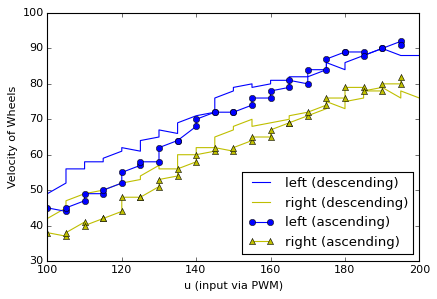

In [9]:
with open('data_coarse.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])

# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]


u = data[:, 0].reshape((-1, 1)) # duty cycle
left_des, left_asc = np.array_split(vleft, 2)

right_des, right_asc = np.array_split(vright, 2)

u_des, u_asc = np.array_split(u, 2)

plt.plot(u_des, left_des, 'b-',  u_des, right_des, 'y-')
plt.plot(u_asc, left_asc, 'b-o',  u_asc, right_asc, 'y-^')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
labels = ("left (descending)", "right (descending)",
          "left (ascending)" , "right (ascending)")
plt.legend(labels, loc=0)
plt.show()

Now we'll collect data appropriate for least-squares to find a linear approximation for the behavior of your motors. In normal operation, the car only has to run within a small range of velocities, so we collect more samples at each PWM, over a smaller PWM range. 

### 5.2. Your Tasks:
1. **Comment out the first set of 5 parameters and uncomment the second set in code block `SID1`.**
2. **Set *LOW_PWM* and *HIGH_PWM*** so that the chosen PWM range is (more or less) linear on your coarse plot from the previous step.
3. If your car makes *very* tight circles (ie: radius less than 1 ft), talk to your GSI!
4. **Copy the numerical data between two "Start" lines to a text file called `data_fine.txt`**, like you did for `data_coarse`.
5. Perform least-squares regression on your data as outlined in the sections below entitled **Least-Squares Regression** and **Evaluate Your Fit**.

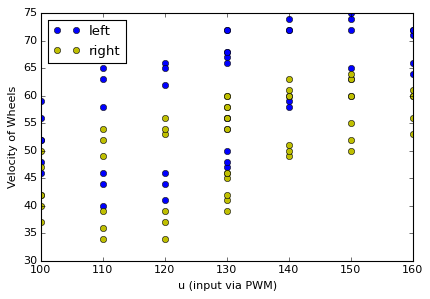

In [12]:
with open('data_fine.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])
    
# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]

u = data[:, 0].reshape((-1, 1)) # duty cycle

plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)
plt.show()

### 5.2.1. Least-Squares Regression
Now that we have some data, we can try performing least-squares regression.


1. Write a function that takes the data as parameters, performs least squares, and extracts the parameters. The function `np.linalg.lstsq` will be helpful here.
2. Call the function once for each wheel.
3. Record the values of $\theta$ and $\beta$ for each wheel.

In [13]:
# YOUR CODE HERE
# Write a function that formulates and performs least squares
# and returns theta and beta for one wheel
def identify_parameters(u, v):
#     np.vstack((u, -1 * np.ones(len(u))))
    A = [[elem, -1] for elem in u]
    return np.linalg.lstsq(A, v)[0]
    # Returns (theta, beta) for given (u, v)
    
# extract parameters, call your function here
theta_left, beta_left = identify_parameters(u, vleft) # 0, 0
theta_right, beta_right = identify_parameters(u, vright) # 0, 0

print("float theta_left = {:.4g};".format(theta_left))
print("float theta_right = {:.4g};".format(theta_right))
print("float beta_left = {:.4g};".format(beta_left))
print("float beta_right = {:.4g};".format(beta_right))

float theta_left = 0.3359;
float theta_right = 0.2948;
float beta_left = -16.68;
float beta_right = -12.25;


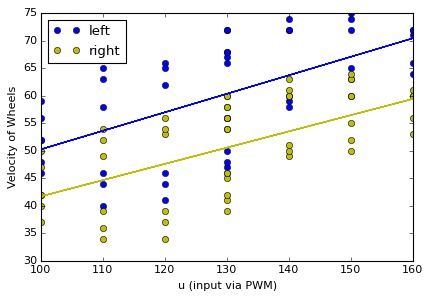

In [14]:
# plot results of least squares fit 
u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)

### 5.2.2. Evaluate Your Fit

1. **Inspect the linearity of this plot and the coarse data plot.**
2. **If you think a different range of PWM may be more linear, change HIGH_PWM and LOW_PWM in the .ino file.**
    - Be careful so your car does not run too close to the minimum or maximum PWM (0 and 255).
    - If our control scheme saturates (e.g. maxes at 255) an input, the car is much harder to control.
3. Run the simulation below.

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

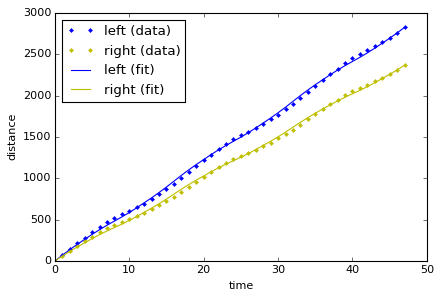

In [15]:
# model for simulation 
def sim(d0, u, theta, beta):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + theta*u[t] - beta
    return d
def get_distances_from_velocities(v):
    d = np.zeros(len(u) + 1)
    d[0] = 0
    for t in range(len(u)):
        d[t+1] = d[t] + v[t] 
    return d
        
# plot simulated trajectories 

dleft = get_distances_from_velocities(vleft)
dright = get_distances_from_velocities(vright)

dleft_simulated  = sim(0, u, theta_left, beta_left)
dright_simulated = sim(0, u, theta_right, beta_right)
plt.plot(dleft, 'b.', 
         dright, 'y.',
         dleft_simulated, 'b-', 
         dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<a id='part6'></a>
## <span style="color:blue">Part 6: Determining the Operating Point</span>

In general, each wheel may have a different range of velocities, illustrated here.

<img src="./images/partial_overlap_lsq.png">


In order to drive straight, the car must be operating at a velocity achievable by both wheels. A good choice of target velocity is the midpoint of the overlapping range of velocity. The below cell will calculate this.

Velocity range = [50.3, 59.4]

Operating point:
float v_star = 54.8;


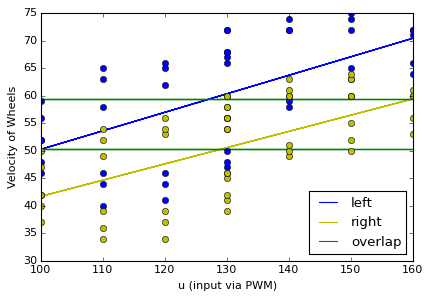

In [16]:
min_vel = max(min(vleft_LS), min(vright_LS))
max_vel = min(max(vleft_LS), max(vright_LS))
print('Velocity range = [{:0.1f}, {:0.1f}]'.format(min_vel, max_vel))
midpoint = (min_vel+max_vel)/2
print('\nOperating point:\nfloat v_star = {:.1f};'.format(midpoint))

u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft_LS, 'b-', u, vright_LS, 'y-')
for i in (min_vel, max_vel):
    plt.plot(u, 0*u + i, 'g-')
plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right", "overlap"), loc=0)

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKOFF</span>
 <span style="color:green">**Show your GSI your data collection and parameters.** Your GSI will double check your parameters.</span>
 
 <span style="color:green">**Show your GSI that you have submitted the lab assignment on Gradescope and have credit for all the labs you've completed.**</span>
 
 ## <span style="color:red">SAVE ALL YOUR DATA!!</span>